In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Diwali Sales Data.csv',encoding = 'unicode_escape')

In [3]:
df.head(5)

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,NaN,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB


In [5]:
#drop blonk columns
df = df.drop(['Status','unnamed1'],axis = 1)

In [6]:
#check null values
df.isnull().sum()

User_ID              0
Cust_name            0
Product_ID           0
Gender               0
Age Group            0
Age                  0
Marital_Status       0
State                0
Zone                 0
Occupation           0
Product_Category     0
Orders               0
Amount              12
dtype: int64

In [7]:
df.shape

(11251, 13)

In [8]:
#drop null values
df.dropna(inplace=True)

In [9]:
print(df.shape)
#check null values again
df.isnull().sum()

(11239, 13)


User_ID             0
Cust_name           0
Product_ID          0
Gender              0
Age Group           0
Age                 0
Marital_Status      0
State               0
Zone                0
Occupation          0
Product_Category    0
Orders              0
Amount              0
dtype: int64

In [10]:
#change data types
df['Amount'] = df['Amount'].astype('int')

In [11]:
df['Amount'].dtypes

dtype('int32')

In [12]:
#describe the dataframe (i.e. count , mean ,std,etc)
df.describe().round()

,User_ID,Age,Marital_Status,Orders,Amount
count,11239.0,11239.0,11239.0,11239.0,11239.0
mean,1003004.0,35.0,0.0,2.0,9454.0
std,1716.0,13.0,0.0,1.0,5222.0
min,1000001.0,12.0,0.0,1.0,188.0
25%,1001492.0,27.0,0.0,2.0,5443.0
50%,1003064.0,33.0,0.0,2.0,8109.0
75%,1004426.0,43.0,1.0,3.0,12675.0
max,1006040.0,92.0,1.0,4.0,23952.0


In [13]:
df[['Age','Orders','Amount']].describe()

,Age,Orders,Amount
count,11239.000000,11239.000000,11239.000000
mean,35.410357,2.489634,9453.610553
std,12.753866,1.114967,5222.355168
min,12.000000,1.000000,188.000000
25%,27.000000,2.000000,5443.000000
50%,33.000000,2.000000,8109.000000
75%,43.000000,3.000000,12675.000000
max,92.000000,4.000000,23952.000000


# Exploratory Data Analysis

### Gender

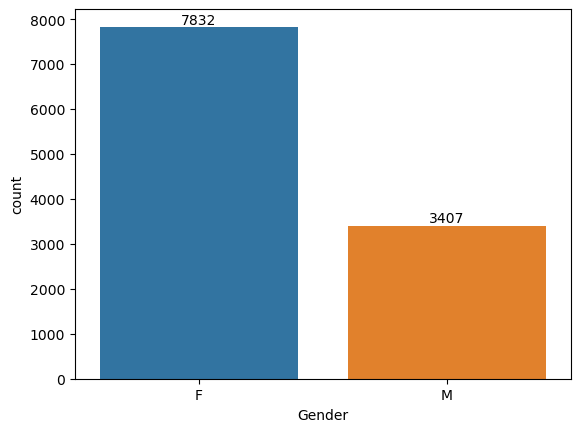

In [14]:
ax = sns.countplot(x = 'Gender',data = df)

for bars in ax.containers:
    ax.bar_label(bars)

  Gender    Amount
0      F  74335853
1      M  31913276


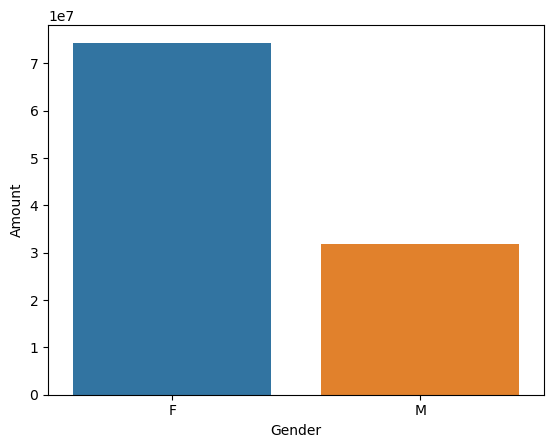

In [15]:
sales_gen = df.groupby(['Gender'], as_index = False)['Amount'].sum().sort_values(by='Amount',ascending = False)
print(sales_gen)
ax = sns.barplot(x = 'Gender',y= 'Amount', data= sales_gen)


#### from the above graphs we can see that most of the buyers are female and even purchasing amount of females are higher than males

### Age

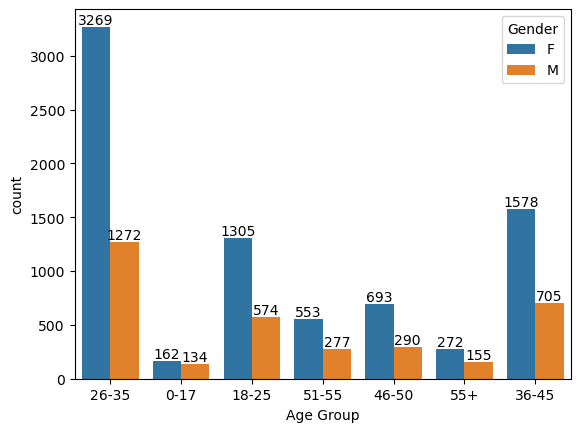

In [16]:
ax = sns.countplot(x = 'Age Group', data = df, hue = 'Gender')
for bars in ax.containers:
    ax.bar_label(bars)

  Age Group    Amount
2     26-35  42613442
3     36-45  22144994
1     18-25  17240732
4     46-50   9207844
5     51-55   8261477
6       55+   4080987
0      0-17   2699653


<AxesSubplot:xlabel='Age Group', ylabel='Amount'>

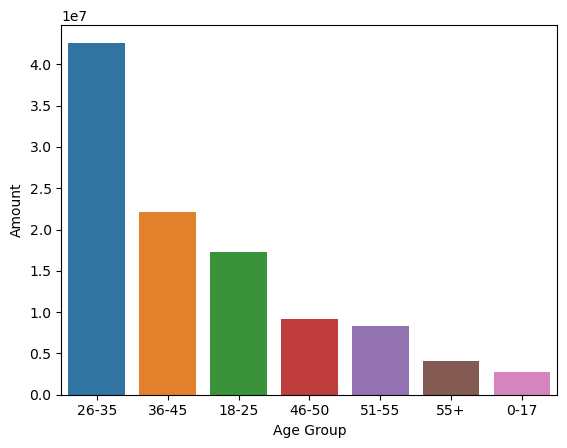

In [17]:
sales_age = df.groupby(['Age Group'],as_index=False)['Amount'].sum().sort_values(by= 'Amount',ascending = False)
print(sales_age)
sns.barplot(x= 'Age Group',y='Amount',data= sales_age)

#### from the above graph we can see that most of the buyers are from the age group between 26-35 years

<AxesSubplot:xlabel='State', ylabel='Orders'>

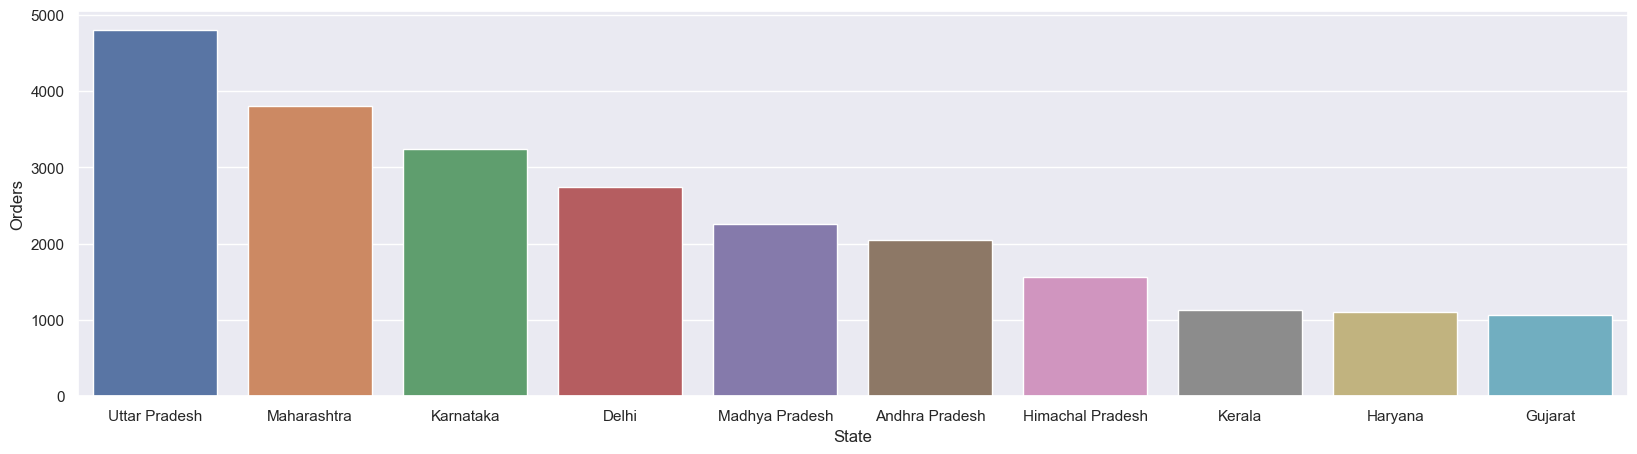

In [18]:
#total numbers of orders from top 10 states
sales_state = df.groupby(['State'],as_index= False)['Orders'].sum().sort_values(by = 'Orders',ascending = False).head(10)
sales_state
sns.set(rc = {'figure.figsize' :(20,5)})
sns.barplot(x = 'State',y = 'Orders',data = sales_state)

<AxesSubplot:xlabel='State', ylabel='Amount'>

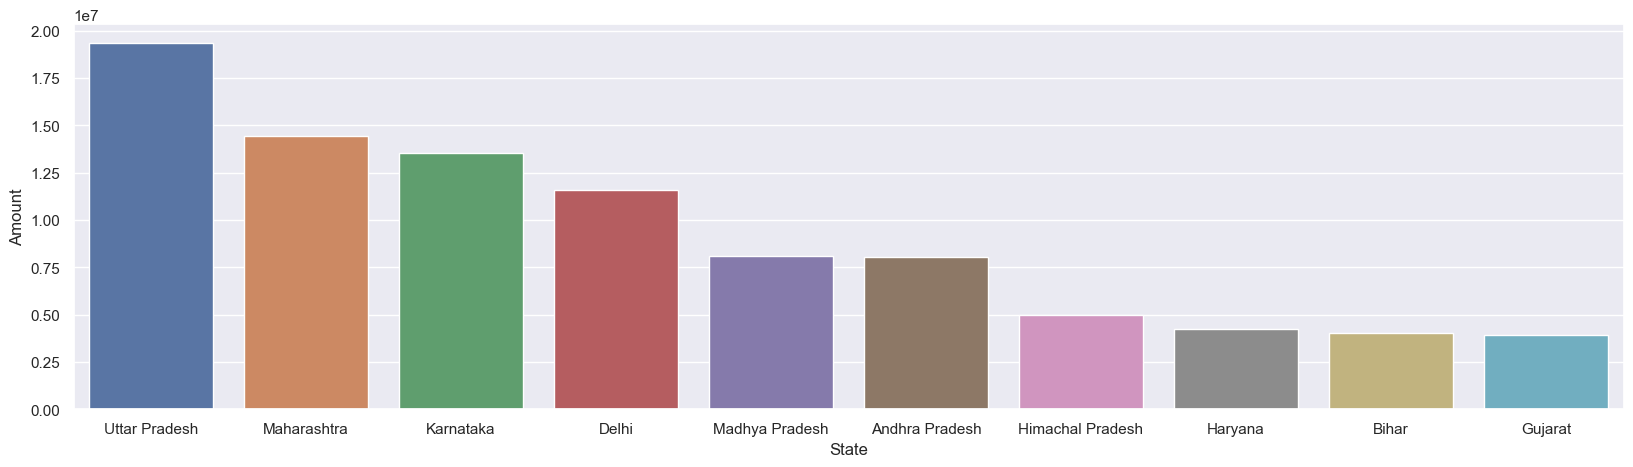

In [19]:
#total amount of sales from top 10 states
sales_state = df.groupby(['State'],as_index= False)['Amount'].sum().sort_values(by = 'Amount',ascending = False).head(10)
sales_state
sns.set(rc = {'figure.figsize' :(20,5)})
sns.barplot(x = 'State',y = 'Amount',data = sales_state)

#### from above graphs we can see that most of the orders and amount/sales comes from the Uttar pradesh , Maharastra , Karnataka respectively. 

### Martial Status

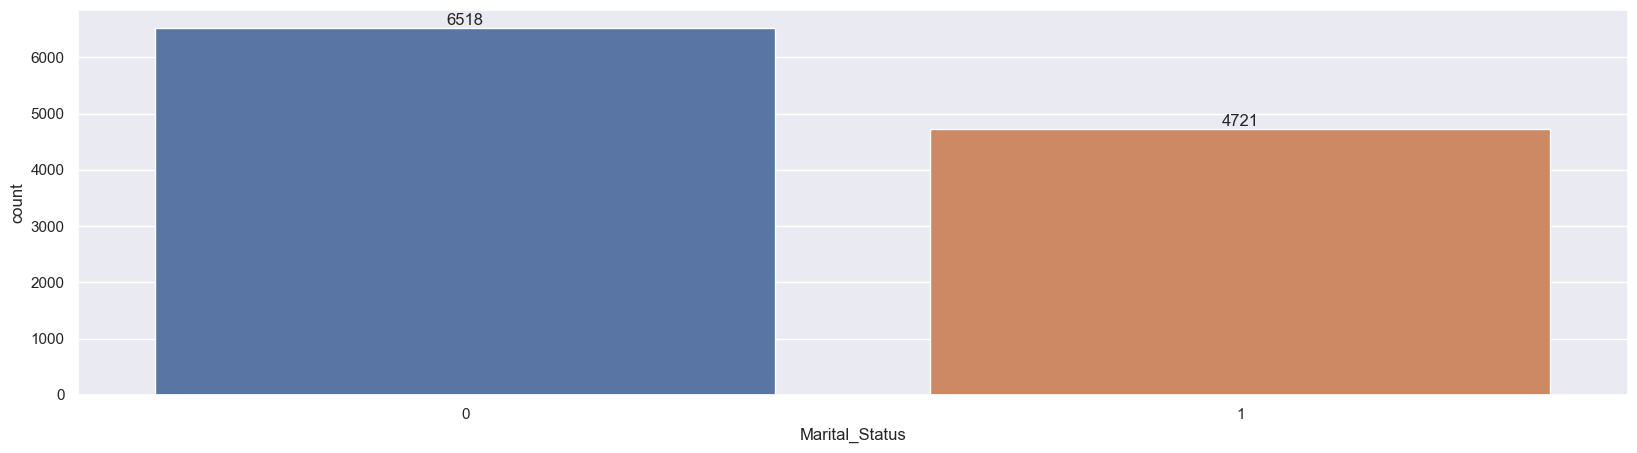

In [20]:
ax = sns.countplot(x= 'Marital_Status' , data = df)
sns.set(rc = {'figure.figsize':(1,1)})
for bars in ax.containers:
    ax.bar_label(bars)

   Marital_Status Gender    Amount
0               0      F  43786646
2               1      F  30549207
1               0      M  18338738
3               1      M  13574538


<AxesSubplot:xlabel='Marital_Status', ylabel='Amount'>

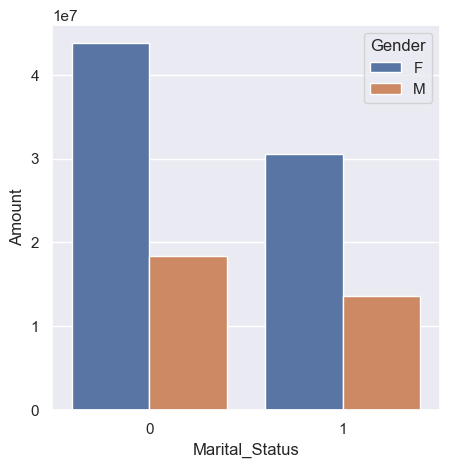

In [21]:
sales_mar = df.groupby(['Marital_Status','Gender'],as_index=False)['Amount'].sum().sort_values(by = 'Amount' , ascending = False)
print(sales_mar)
sns.set(rc = {'figure.figsize':(5,5)})
sns.barplot(data = sales_mar,x= 'Marital_Status',y= 'Amount',hue= 'Gender')

#### from the above graph we can see the most of the buyers are married(Women).

### Occupation

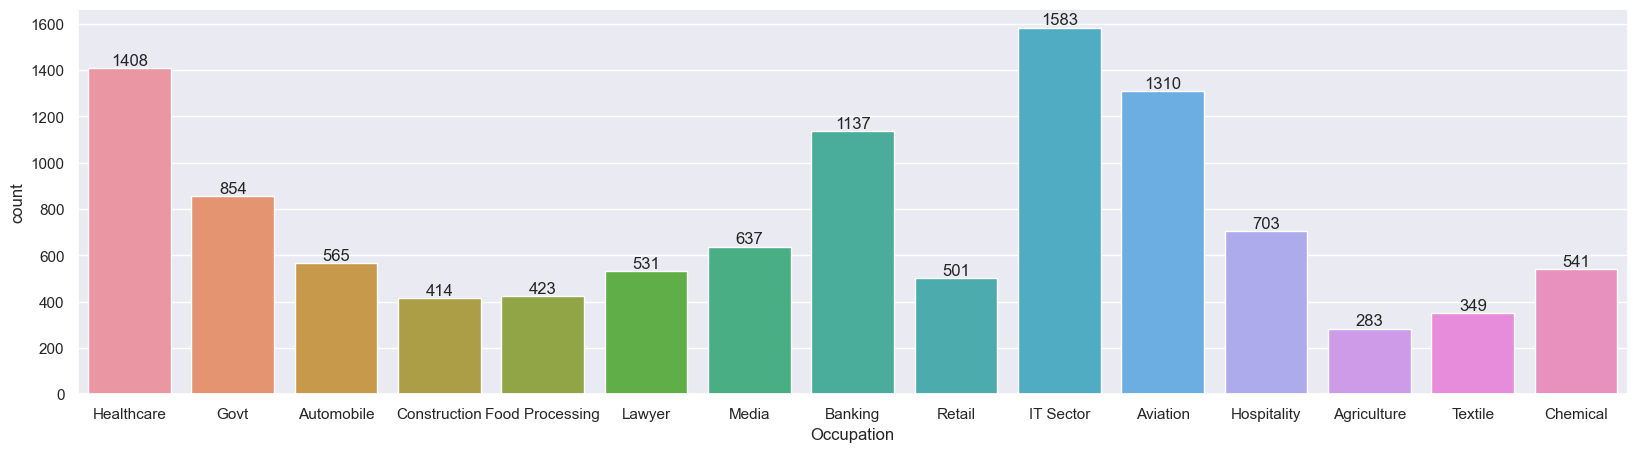

In [27]:
sns.set(rc={'figure.figsize':(20,5)})
ax = sns.countplot(data = df,x= 'Occupation')

for bars in ax.containers:
    ax.bar_label(bars)

         Occupation    Amount
10        IT Sector  14755079
8        Healthcare  13034586
2          Aviation  12602298
3           Banking  10770610
7              Govt   8517212
9       Hospitality   6376405
12            Media   6295832
1        Automobile   5368596
4          Chemical   5297436
11           Lawyer   4981665
13           Retail   4783170
6   Food Processing   4070670
5      Construction   3597511
14          Textile   3204972
0       Agriculture   2593087


<AxesSubplot:xlabel='Occupation', ylabel='Amount'>

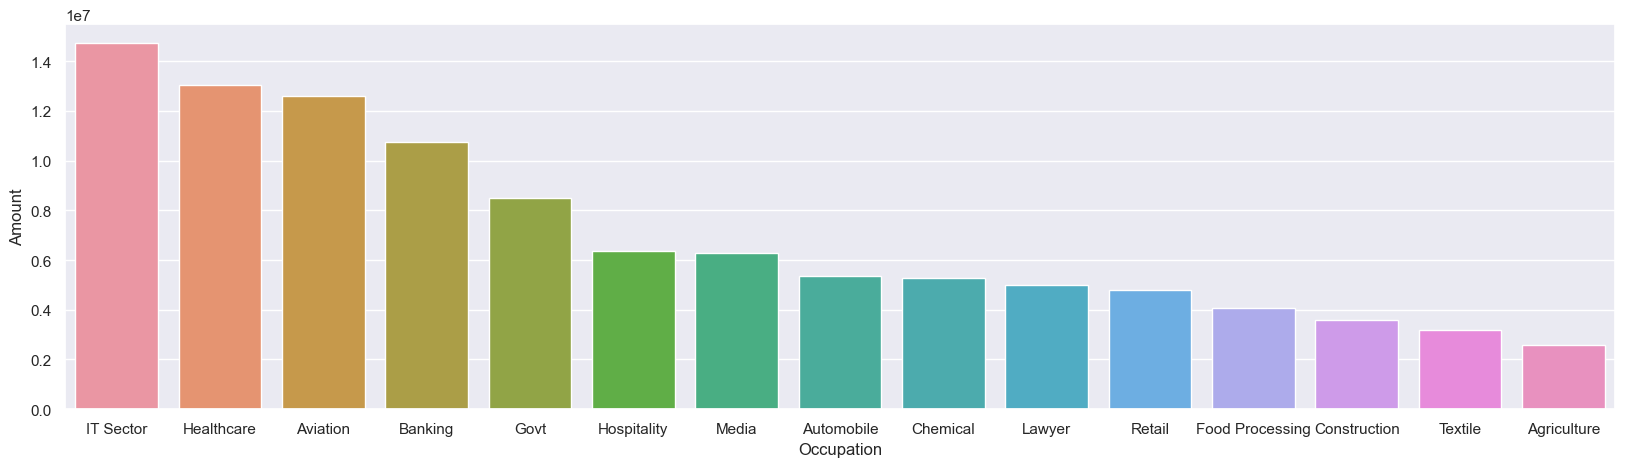

In [29]:
sales_occu = df.groupby(['Occupation'],as_index=False)['Amount'].sum().sort_values(by = 'Amount',ascending=False)
print(sales_occu)

sns.barplot(data =  sales_occu,x = 'Occupation',y= 'Amount')

#### from above graphs we can see that most of the buyers working in it , healthcare and Aviation respctively

### Product Category

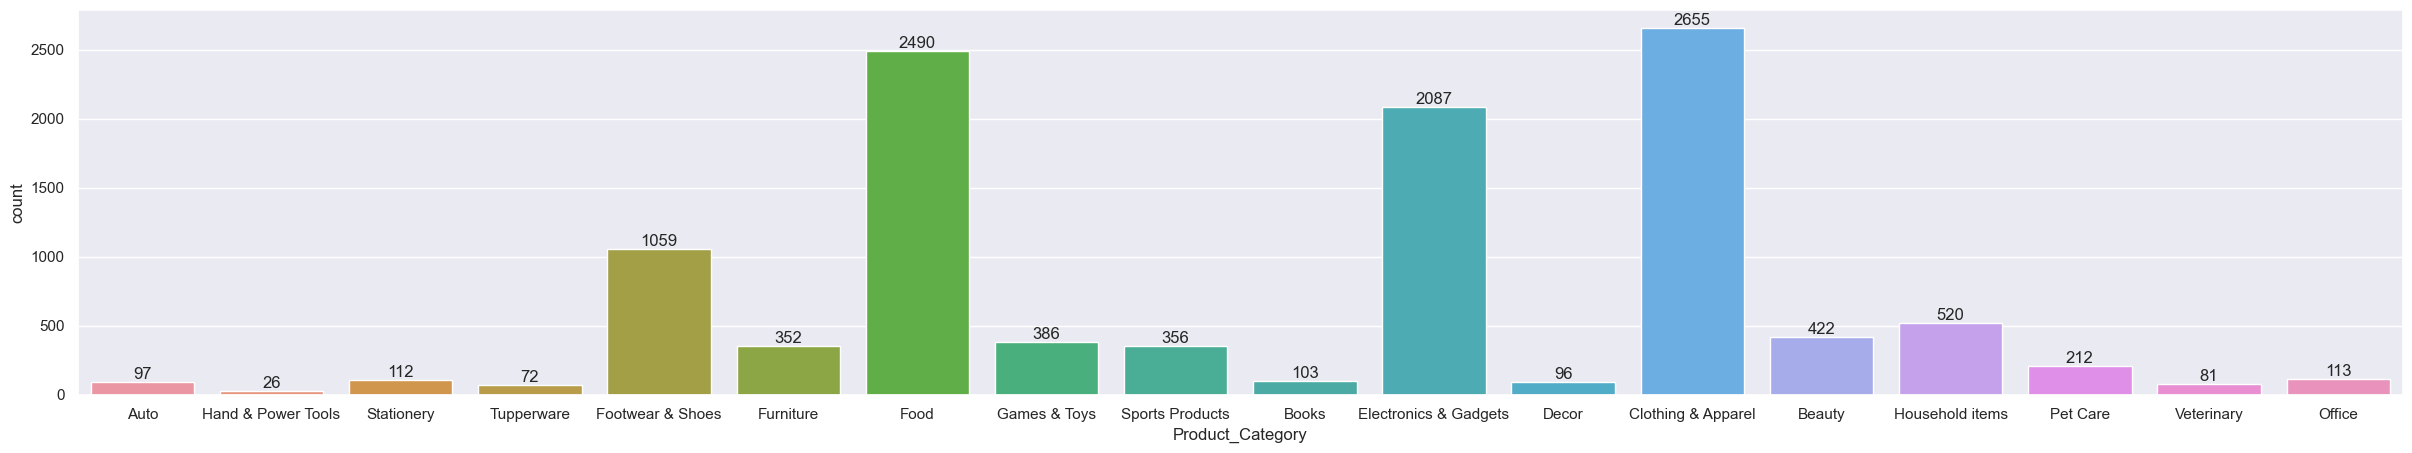

In [31]:
sns.set(rc={'figure.figsize':(30,5)})
ax = sns.countplot(data = df,x= 'Product_Category')

for bars in ax.containers:
    ax.bar_label(bars)

         Product_Category    Amount
6                    Food  33933883
3      Clothing & Apparel  16495019
5   Electronics & Gadgets  15643846
7        Footwear & Shoes  15575209
8               Furniture   5440051
9            Games & Toys   4331694
14        Sports Products   3635933
1                  Beauty   1959484
0                    Auto   1958609
15             Stationery   1676051


<AxesSubplot:xlabel='Product_Category', ylabel='Amount'>

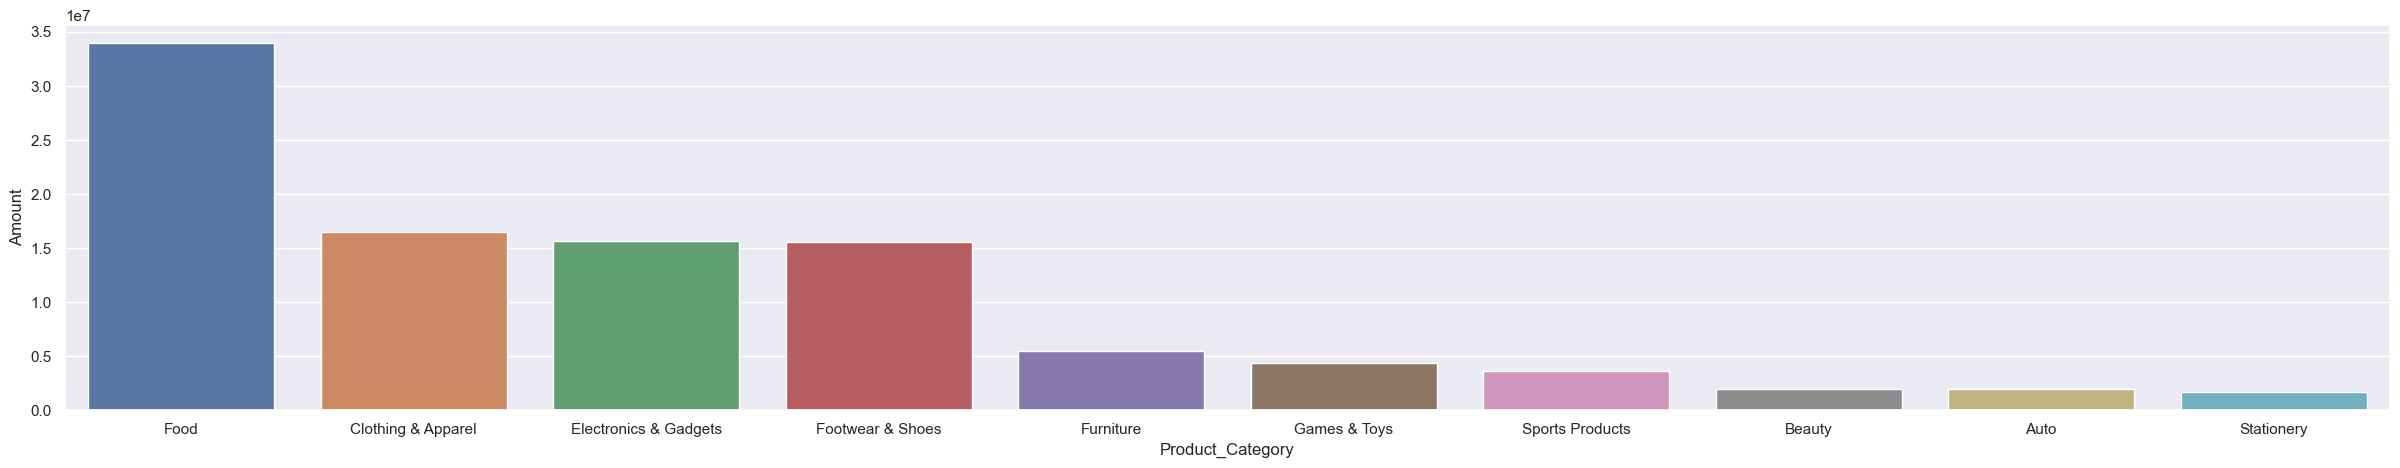

In [34]:
sales_prod = df.groupby(['Product_Category'],as_index=False)['Amount'].sum().sort_values(by = 'Amount',ascending=False).head(10)
print(sales_prod)

sns.barplot(data =  sales_prod,x = 'Product_Category',y= 'Amount')

#### from the above graph we can see that most of the sold product are Food,Clothing & Apparel ,Electronic & Gadgets.

### Top 10 ordered products

<AxesSubplot:xlabel='Product_ID', ylabel='Orders'>

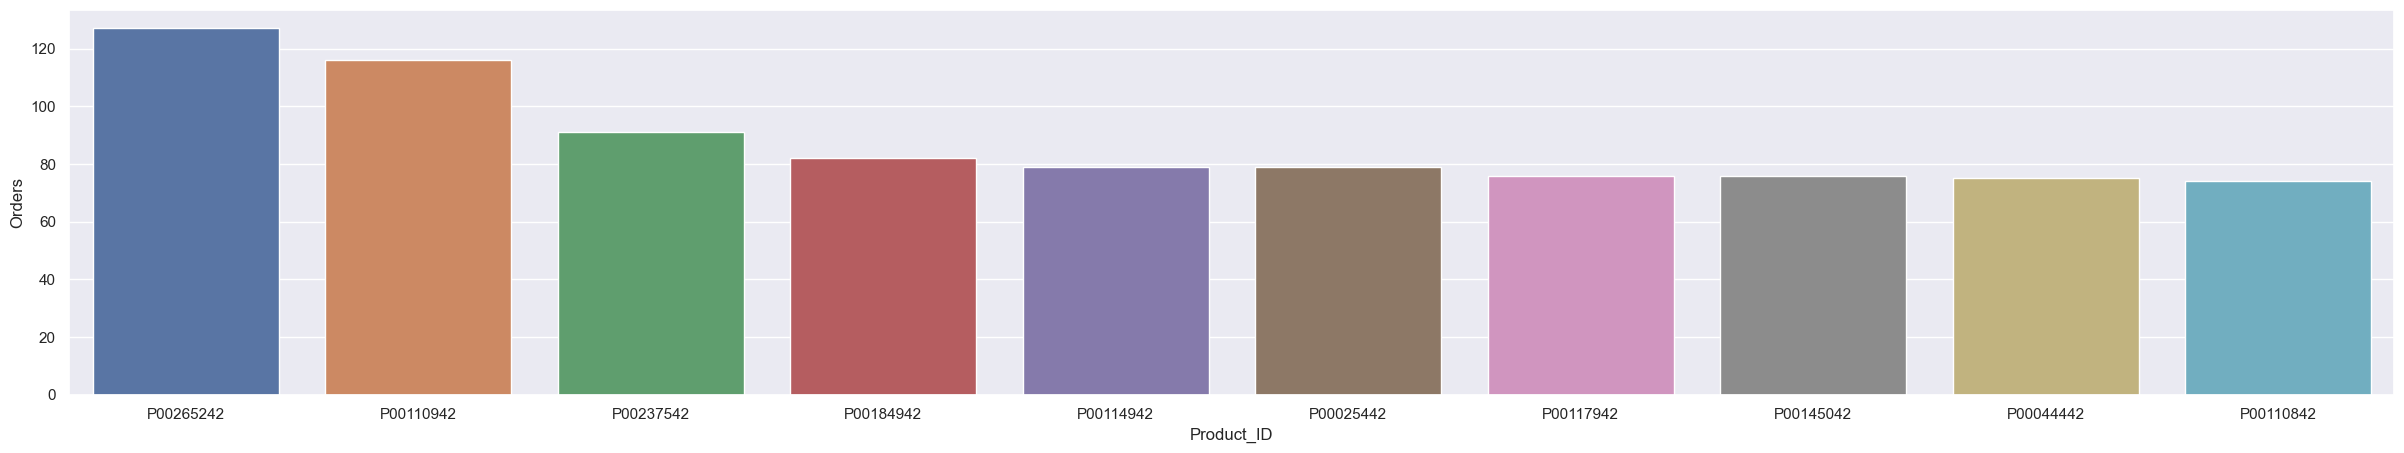

In [37]:
sales_prod = df.groupby(['Product_ID'],as_index=False)['Orders'].sum().sort_values(by = 'Orders',ascending=False).head(10)

sns.barplot(data =  sales_prod,x = 'Product_ID',y= 'Orders')

## Conclusion:

#### Married women age group 26-35 from UP ,Maharastra and karnataka working in IT,Healthcare, Aviation are more likely to buy products from Food , Clothing and Electronics.